# Exploratory Data Analysis

In [22]:
# Oil Data Set
oil = nasdaqdatalink.get("FRED/DCOILBRENTEU", start_date="2000-01-01", end_date="2022-01-01")
oil

,Value
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77
...,...
2021-12-23,76.26
2021-12-24,75.24
2021-12-29,78.63


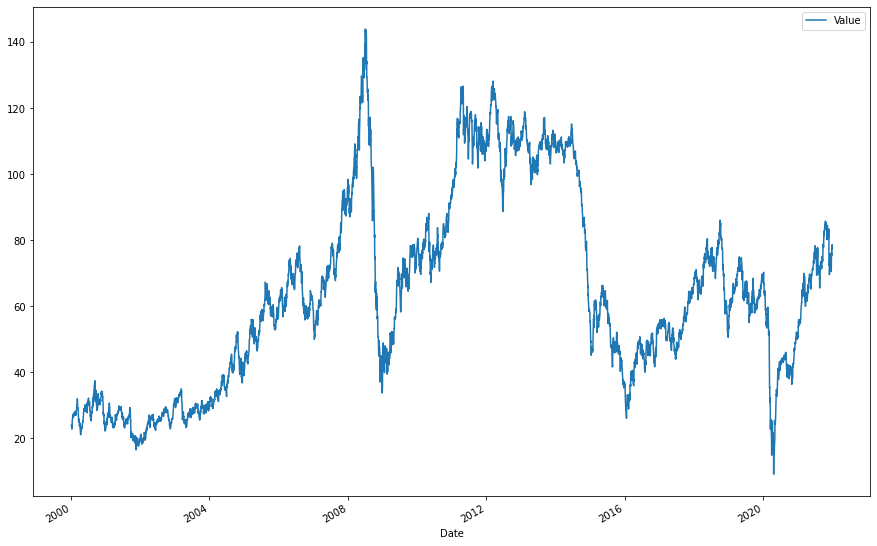

In [29]:
oil.plot(figsize=(15,10))

In [30]:
# Oil Price and Sales Data
oil_sales = pd.read_csv('C:/Users/Admin/Desktop/Data Capstone/oilprice_sales.csv', sep=';')
oil_sales

,Month,Price,Sales
0,Jan-00,27.26,12819.1
1,Feb-00,29.37,11972.6
2,Mar-00,29.84,11137.8
3,Apr-00,25.72,11291.3
4,May-00,28.79,12429.0
...,...,...,...
260,Sep-21,71.65,1843.9
261,Oct-21,81.48,2020.8
262,Nov-21,79.15,2192.4
263,Dec-21,71.71,1915.5


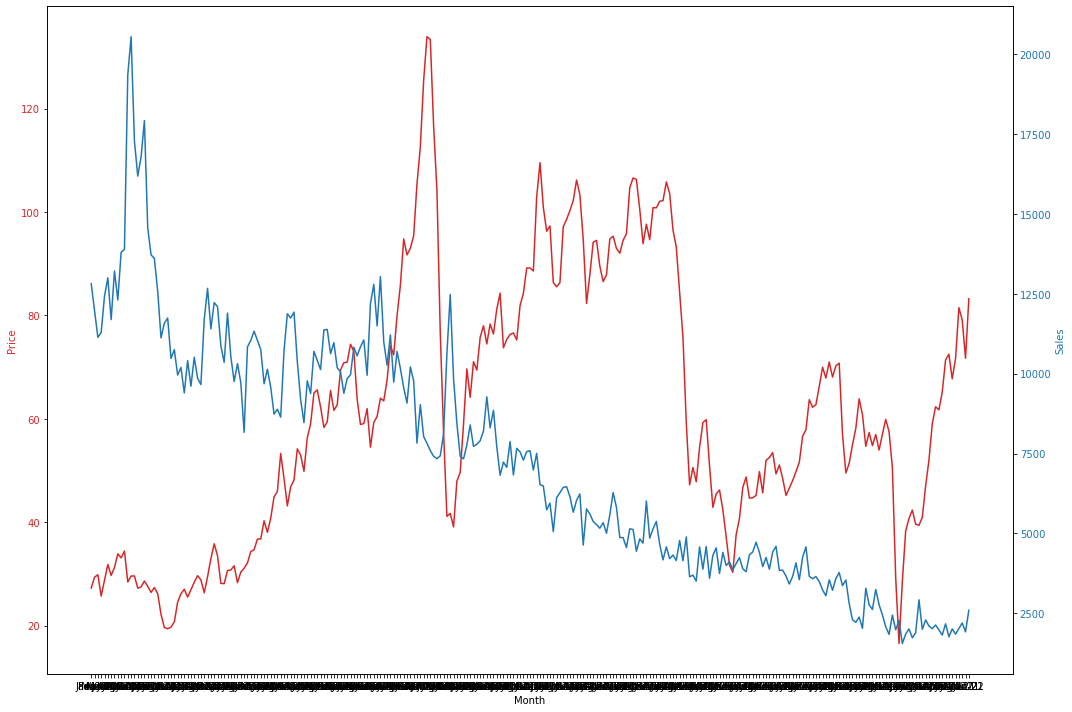

In [48]:
time = oil_sales['Month']
data1 = oil_sales['Price']
data2 = oil_sales['Sales']

fig, ax1 = plt.subplots(figsize = (15,10))

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Price', color=color)
ax1.plot(time, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Sales', color=color)  
ax2.plot(time, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()
plt.show()

# ARIMA Model (Oil Price)

In [34]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
import nasdaqdatalink
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [5]:
# Ovdje uzimam novi data set, buduci da prosli nije imao konzistentnu datu
oil = nasdaqdatalink.get("FRED/DCOILBRENTEU", start_date="2000-01-01", end_date="2022-01-01")

In [7]:
oil.head()

,Value
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77


In [10]:
model = ARIMA(oil, order=(2, 2, 10))  
results_ARIMA = model.fit(disp=-1)  

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


In [13]:
arima_pred = results_ARIMA.predict(oil['Value'].index[5000], oil['Value'].index[-1], typ="levels")

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

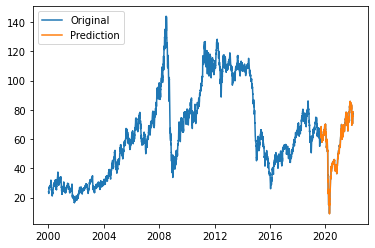

In [16]:
plt.plot(oil, label='Original')
plt.plot(arima_pred, label='Prediction')
plt.legend(loc=2)
plt.title('RMSE: %.4f'% np.sqrt(sum((arima_pred-oil[5000:])**2)/len(oil[5000:])))

In [17]:
len(oil)

5589

In [18]:
arima_pred_recent = results_ARIMA.predict(oil['Value'].index[5500], oil['Value'].index[-1], typ="levels")

TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

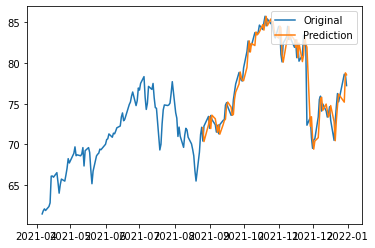

In [20]:
plt.plot(oil[5400:], label='Original')
plt.plot(arima_pred_recent, label='Prediction')
plt.legend(loc=1)
plt.title('RMSE: %.4f'% np.sqrt(sum((arima_pred_recent-oil[5500:])**2)/len(oil[5500:])))

In [ ]:
# Link na source code: https://github.com/sdasadia/Oil-Price-Prediction/blob/master/Oil%20Price%20Forecast.ipynb

# SARIMAX (Oil Price & Sales)

In [2]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline

In [3]:
oil = pd.read_csv('C:/Users/Admin/Desktop/Data Capstone/oilprice_sales.csv', sep=';')

In [4]:
oil.head()

,Month,Price,Sales
0,Jan-00,27.26,12819.1
1,Feb-00,29.37,11972.6
2,Mar-00,29.84,11137.8
3,Apr-00,25.72,11291.3
4,May-00,28.79,12429.0


In [5]:
oil.index = oil.Month

In [6]:
oil.tail()

,Month,Price,Sales
Month,,,
Sep-21,Sep-21,71.65,1843.9
Oct-21,Oct-21,81.48,2020.8
Nov-21,Nov-21,79.15,2192.4
Dec-21,Dec-21,71.71,1915.5
Jan-22,Jan-22,83.22,2589.9


In [7]:
sarimax_model = SARIMAX(oil['Price'], order = (1,1,1), seasonal_order = (1,1,1,12), exog = oil['Sales'])

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:213: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [8]:
result = sarimax_model.fit(disp=False)

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Price   No. Observations:                  265
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -795.823
Date:                            Tue, 19 Apr 2022   AIC                           1603.646
Time:                                    15:32:20   BIC                           1624.822
Sample:                                         0   HQIC                          1612.167
                                            - 265                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Sales      -6.695e-05      0.000     -0.189      0.850      -0.001       0.001
ar.L1          0.3234      0.117      2.757      0.006       0.093       0.553
ma.L1          0.0390      0.148      0.264      0.792      -0.250       0.328
ar.S.L12       0.0359      0.069      0.521      0.602      -0.099       0.171
ma.S.L12      -0.9645      0.174     -5.528      0.000      -1.306      -0.623
sigma2        28.7424      4.090      7.027      0.000      20.726      36.759
===================================================================================
Ljung-Box (Q):                       33.40   Jarque-Bera (JB):                45.82
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               2.06   Skew:                            -0.55
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""